In [42]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_json("business.json", lines=True)

In [44]:
# focus just open business
data_open = data[data['is_open']==1]
data_open = data_open.dropna()
data_open = data_open.drop(["address", "business_id", "name", "is_open"], 1)

# focus just restaurants
data_open = data_open[data_open["categories"].str.contains("Restaurant", regex=True)]

#new_data = pd.DataFrame()
#for i in [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]:
#    new_data = new_data.append(data_open[data_open["stars"]==i].sample(1250, random_state=0))
#y = new_data["stars"]
#X = new_data.drop("stars", 1)

y = data_open["stars"]
X = data_open.drop("stars", 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [45]:
X_train["categories"] = X_train["categories"].astype("str")
X_train["categories"] = X_train["categories"].str.split(", ")

mlb = MultiLabelBinarizer()
categories_train = mlb.fit_transform(X_train["categories"])

# Edit 1: X_test -> X_test["categories"]
categories_test = mlb.transform(X_test["categories"])

categories_names = mlb.classes_

# X["categories"]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:951: UserWarning: unknown class(es) [' ', '&', "'", '(', ')', ',', '-', '/', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b

In [46]:
cat_train_sum = categories_train.sum(axis=0)
cat_train_sum

array([    1,    36,     4,   156,     2,     1,    20,     1,    57,
          78,     1,     1,     2,     1,     7,     1,     1,     2,
        2172,  3508,    12,     1,     1,     2,     5,     2,    14,
          10,    38,    56,     1,    17,     6,     6,    26,     1,
           8,     2,    30,   488,   901,     1,     6,     4,     2,
           1,     3,     1,     2,     7,     1,    47,   234,   852,
          12,     1,     1,     2,   801,     5,  4048,     4,     5,
           1,     1,    60,    32,   546,   219,     2,    30,    20,
           1,     8,     3,     4,     2,     1,    73,     2,     1,
           1,     2,    17,     8,     2,    28,    66,    34,     1,
        2926,   170,    33,     1,    72,   114,   348,     2,  2690,
           5,     1,     2,    46,     2,     3,  1463,    20,   113,
          23,   888,    13,     1,     1,    51,     1,     1,     5,
           2,     1,     4,   261,    97,   987,     2,     1,    35,
           1,    91,

In [47]:
# print(cat_train_sum)

first_valid = False

df_categories_train = pd.DataFrame(categories_train)
df_categories_test = pd.DataFrame(categories_test)
cat_names = []

for column, res in enumerate(cat_train_sum, 0):
    if res >= 1000:
        if first_valid:
            cat_train = pd.concat([cat_train, df_categories_train.iloc[:,column]], axis=1)
            cat_test = pd.concat([cat_test, df_categories_test.iloc[:,column]], axis=1)
        else:
            cat_train = df_categories_train.iloc[:,column]
            cat_test = df_categories_test.iloc[:,column]
            first_valid = True
        cat_names.append(categories_names[column])
        
cat_train.shape
cat_test.shape

(8355, 21)

In [7]:
cat_names

['American (New)',
 'American (Traditional)',
 'Bars',
 'Breakfast & Brunch',
 'Burgers',
 'Cafes',
 'Chicken Wings',
 'Chinese',
 'Coffee & Tea',
 'Event Planning & Services',
 'Fast Food',
 'Food',
 'Italian',
 'Japanese',
 'Mexican',
 'Nightlife',
 'Pizza',
 'Restaurants',
 'Salad',
 'Sandwiches',
 'Seafood']

In [8]:
print(categories_train.shape)
print(categories_test.shape)
print(len(categories_names))
print(cat_train.shape)
print(cat_test.shape)

(25065, 653)
(8355, 653)
653
(25065, 21)
(8355, 21)


In [9]:
## DON'T NEED THIS CELL #######
# Get rid of special charactors
pretty_cat_names = []
for cat in categories_names:
    pretty_cat_names.append(cat.translate({ord(c): None for c in '\\\'\"\[\]'}))
len(pretty_cat_names)

653

In [0]:
#import re
#cleanString = re.sub('\W+','', string )

In [0]:
####### DON'T NEED THIS CELL #######
for cat in pretty_cat_names:
    with open("cat_names.txt", "a") as f:
        print(cat, file=f)

In [10]:
type(cat_train)

pandas.core.frame.DataFrame

In [0]:
##### To handle repeated words #####
#import numpy as np
#distinct_cat_name = []
#for i in range(len(pretty_cat_names)):
#    if pretty_cat_names[i] not in distinct_cat_name:
#        distinct_cat_name.append(pretty_cat_names[i])
#    else:
#        np.delete(categories_train, i, axis=1)
#        np.delete(categories_test, i, axis=1)
#        #categories_train.drop(categories_train.columns[i], axis=1, inplace=True)
#        #categories_test.drop(categories_test.columns[[i]], axis=1, inplace=True)

#print(categories_train.shape)
#print(categories_test.shape)
#print(len(categories_names))

In [11]:
cat_train.columns = cat_names
cat_corr = cat_train.corr()
# corr.columns = cat_names

In [12]:
cat_corr

American (New)  American (Traditional)      Bars  \
American (New)                   1.000000                0.163917  0.234392   
American (Traditional)           0.163917                1.000000  0.277635   
Bars                             0.234392                0.277635  1.000000   
Breakfast & Brunch               0.121208                0.155241 -0.008626   
Burgers                          0.062265                0.145087  0.042931   
Cafes                           -0.006518               -0.029801 -0.037586   
Chicken Wings                   -0.019380                0.078801  0.030844   
Chinese                         -0.075851               -0.104664 -0.101637   
Coffee & Tea                    -0.051134               -0.079987 -0.079330   
Event Planning & Services        0.024452                0.010565  0.008352   
Fast Food                       -0.064077               -0.036687 -0.163045   
Food                            -0.007536               -0.066150 -0.070550   
Italian                         -0.038866               -0.069508  0.011322   
Japanese                        -0.060427               -0.085579 -0.057457   
Mexican                         -0.063037               -0.089314 -0.044046   
Nightlife                        0.234742                0.273717  0.979302   
Pizza                           -0.046202               -0.081496 -0.039791   
Restaurants                      0.006154                0.008059  0.008768   
Salad                            0.029159               -0.003988 -0.032678   
Sandwiches                       0.000391               -0.022012 -0.077502   
Seafood                          0.034113                0.031996  0.060018   

                           Breakfast & Brunch   Burgers     Cafes  \
American (New)                       0.121208  0.062265 -0.006518   
American (Traditional)               0.155241  0.145087 -0.029801   
Bars                                -0.008626  0.042931 -0.037586   
Breakfast & Brunch                   1.000000  0.024478  0.149567   
Burgers                              0.024478  1.000000 -0.066533   
Cafes                                0.149567 -0.066533  1.000000   
Chicken Wings                       -0.052810  0.021927 -0.057188   
Chinese                             -0.089794 -0.093356 -0.054507   
Coffee & Tea                         0.147805  0.099379  0.353457   
Event Planning & Services            0.019329 -0.056004  0.034665   
Fast Food                           -0.082692  0.316644 -0.089320   
Food                                 0.100929  0.037756  0.221966   
Italian                             -0.060936 -0.087751 -0.048908   
Japanese                            -0.068847 -0.073926 -0.040264   
Mexican                             -0.053553 -0.084940 -0.061842   
Nightlife                           -0.009442  0.038376 -0.036334   
Pizza                               -0.094690 -0.065610 -0.076317   
Restaurants                          0.007263  0.006927  0.004974   
Salad                                0.062362 -0.008815  0.000741   
Sandwiches                           0.095401  0.013169  0.049485   
Seafood                             -0.042344 -0.048189 -0.051645   

                           Chicken Wings   Chinese  Coffee & Tea  \
American (New)                 -0.019380 -0.075851     -0.051134   
American (Traditional)          0.078801 -0.104664     -0.079987   
Bars                            0.030844 -0.101637     -0.079330   
Breakfast & Brunch             -0.052810 -0.089794      0.147805   
Burgers                         0.021927 -0.093356      0.099379   
Cafes                          -0.057188 -0.054507      0.353457   
Chicken Wings                   1.000000 -0.055084     -0.066365   
Chinese                        -0.055084  1.000000     -0.059991   
Coffee & Tea                   -0.066365 -0.059991      1.000000   
Event Planning & Services      -0.013595 -0.049786     -0.021743   
Fast Food            

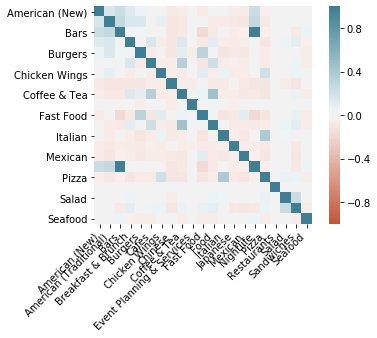

In [13]:
ax = sns.heatmap(
    cat_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
X_train.loc[:, "hours"].values[0].keys()

dict_keys(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [15]:
scaler = StandardScaler()

lat_long_rc_train = pd.concat([X_train["latitude"], X_train["longitude"], X_train["review_count"]], axis=1)
lat_long_rc_test = pd.concat([X_test["latitude"], X_test["longitude"], X_test["review_count"]], axis=1)

lat_long_rc_train = scaler.fit_transform(lat_long_rc_train)
lat_long_rc_test = scaler.transform(lat_long_rc_test)

#latitude_train = scaler.fit_transform(X_train.loc[:, ["latitude"]])
#latitude_test = scaler.transform(X_test.loc[:, ["latitude"]])
#longitude_train = scaler.fit_transform(X_train.loc[:, ["longitude"]])
#longitude_test = scaler.transform(X_test.loc[:, ["longitude"]])
#review_count_train = scaler.fit_transform(X_train.loc[:, ["review_count"]])
#review_count_test = scaler.transform(X_test.loc[:, ["review_count"]])

In [16]:
lat_long_rc_train = pd.DataFrame(lat_long_rc_train)
lat_long_rc_train.columns = ["latitude", "longitude", "review_count"]
lat_long_rc_train

latitude  longitude  review_count
0     -1.290797  -1.197324     -0.398661
1     -0.798631  -1.385508     -0.191941
2      0.075186   0.731947     -0.279907
3     -0.776229  -1.381818      0.393033
4      1.068763   1.135228     -0.420653
5     -1.342490  -1.195815      0.296270
6      0.078012   0.755022     -0.257915
7     -1.288057  -1.202549     -0.200738
8     -0.803657  -1.380300     -0.420653
9      0.699476   0.782835     -0.385466
10     0.724465   0.788911     -0.341483
11     2.147523  -1.310033     -0.372271
12     1.058541   1.117452     -0.407458
13     0.711229   0.766889     -0.125966
14    -1.320172  -1.199505     -0.332687
15     0.711701   0.787217     -0.411856
16     0.264440   0.655623     -0.178746
17    -0.800447  -1.383238      1.703726
18    -0.814779  -1.387709      0.634939
19    -0.797643  -1.382874     -0.420653
20     0.681950   0.760920     -0.420653
21     1.075121   1.132162     -0.337085
22     0.740087   0.784716     -0.425051
23    -0.812859  -1.389975      1.202320
24     0.583109   0.176459     -0.174348
25    -0.925124   0.693585     -0.376670
26     0.707361   0.784926     -0.416254
27     1.073171   1.133144     -0.301898
28     0.710989   0.788533     -0.416254
29    -0.780237  -1.390669     -0.235924
...         ...        ...           ...
25035  0.728058   0.783837      0.529380
25036  1.070198   1.135277     -0.200738
25037  1.069068   1.134572     -0.416254
25038  0.738861   0.782790     -0.231526
25039  0.234852   0.634686     -0.332687
25040  0.745677   0.809436     -0.411856
25041 -0.799343  -1.385558     -0.301898
25042 -0.803572  -1.384388     -0.213932
25043 -0.976452   0.694034     -0.403059
25044 -0.991085   0.697053     -0.385466
25045  2.166559  -1.316454     -0.293102
25046  0.699051   0.781940      0.639338
25047 -1.337179  -1.187769      1.444226
25048 -1.328612  -1.192310      0.595355
25049  2.171686  -1.317796     -0.345881
25050 -0.959927   0.698759     -0.125966
25051  0.089891   0.760643     -0.381068
25052  0.060267   0.750208     -0.403059
25053  0.701120   0.778351     -0.306297
25054  1.030739   1.153884     -0.407458
25055 -0.823696  -1.379547      0.868049
25056  1.075098   1.125615     -0.403059
25057  0.290069   0.651617     -0.398661
25058  0.573556   0.173022     -0.002814
25059  1.123478   1.108438     -0.416254
25060  0.745128   0.790215     -0.134763
25061 -0.795480  -1.379880     -0.038001
25062  0.687772   0.762213     -0.090780
25063  0.724144   0.789152     -0.152356
25064  1.070089   1.135678      0.019177

[25065 rows x 3 columns]

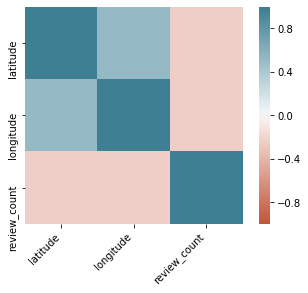

In [17]:
lat_long_rc_corr = lat_long_rc_train.corr()
ax = sns.heatmap(
    lat_long_rc_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
days_open_train = [list(x.keys()) for x in X_train.loc[:, "hours"].values]
days_open_train = mlb.fit_transform(days_open_train)
days_open_test = [list(x.keys()) for x in X_test.loc[:, "hours"].values]
days_open_test = mlb.transform(days_open_test)

In [19]:
days_open_train = pd.DataFrame(days_open_train)
days_open_train.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

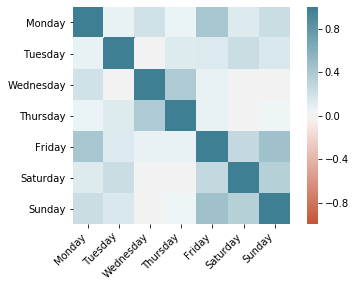

In [20]:
days_open_corr = days_open_train.corr()
ax = sns.heatmap(
    days_open_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
X_train.loc[:, "attributes"].keys()

Int64Index([118766, 182208, 146023,   4212,  97472,  24934,  92863, 183538,
            154183,  36216,
            ...
            133614,  41825, 151801,  79163, 140431,  74379,  58048,  93066,
            130964,  19480],
           dtype='int64', length=25065)

In [22]:
type(X_train["city"])

pandas.core.series.Series

In [23]:
# Doing One-Hot Encoding on City, Postal Code, State

enc = OneHotEncoder(handle_unknown='ignore')

city_pc_st_train = pd.concat([X_train["city"], X_train["postal_code"], X_train["state"]], axis=1)
city_pc_st_test = pd.concat([X_test["city"], X_test["postal_code"], X_test["state"]], axis=1)

city_pc_st_train = enc.fit_transform(city_pc_st_train)
city_pc_st_test = enc.transform(city_pc_st_test)

#city_train = enc.fit_transform(X_train["city"])
#city_test = enc.transform(X_test["city"])
len(enc.categories_[2])
city_pc_st_test

<8355x7255 sparse matrix of type '<class 'numpy.float64'>'
	with 23707 stored elements in Compressed Sparse Row format>

In [38]:
enc = OneHotEncoder(handle_unknown='ignore')

state_train = pd.concat([X_train["state"]], axis=1)
state_train = enc.fit_transform(state_train)
state_train.shape

(25065, 19)

In [39]:
state_train = pd.DataFrame(state_train.toarray())
state_train.columns = enc.categories_
state_train


AB   AR   AZ   BC   IL   NC   NE   NM   NV   NY   OH   ON   PA   QC  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
5      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
7      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
9      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
10     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
11     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
13     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
14     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
16     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
17     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
18     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
19     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
20     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
21     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
22     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
23     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
24     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
26     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
27     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
28     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
29     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
25035  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
25036  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
25037  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
25038  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
25039  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
25040  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
25041  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
25042  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
25043  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25044  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25045  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25046  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
25047  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25048  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25049  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25050  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25051  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
25052  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
25053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [40]:
state_corr = state_train.corr()

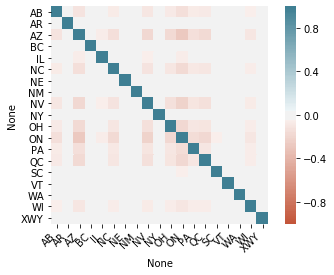

In [41]:
ax = sns.heatmap(
    state_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
price_train = [x.get("RestaurantsPriceRange2", "none").lower() for x in X_train.loc[:, "attributes"].values]
reservation_train = [x.get("RestaurantsReservations", "none").lower() for x in X_train.loc[:, "attributes"].values]
alcohol_train = [x.get("Alcohol", "na").strip('u\'').lower() for x in X_train.loc[:, "attributes"].values]
wifi_train = [x.get("WiFi", "na").strip('u\'').lower() for x in X_train.loc[:, "attributes"].values]

# TODO: keep just either 'no' or 'none'
wifi_train = [x if x!='none' else 'no' for x in wifi_train]

delivery_train = [x.get("RestaurantsDelivery", "none").lower() for x in X_train.loc[:, "attributes"].values]
goodForGroups_train = [x.get("RestaurantsGoodForGroups", "none").lower() for x in X_train.loc[:, "attributes"].values]
goodForKids_train = [x.get("GoodForKids", "none").lower() for x in X_train.loc[:, "attributes"].values]

attributes_train = pd.DataFrame(
    {'price': price_train,
     'reservation': reservation_train,
     'alcohol': alcohol_train,
     'wifi': wifi_train,
     'delivery': delivery_train,
     'goodForGroups': goodForGroups_train,
     'goodForKids': goodForKids_train
    })

attributes_train = enc.fit_transform(attributes_train)

price_test = [x.get("RestaurantsPriceRange2", "none").lower() for x in X_test.loc[:, "attributes"].values]
reservation_test = [x.get("RestaurantsReservations", "none").lower() for x in X_test.loc[:, "attributes"].values]
alcohol_test = [x.get("Alcohol", "na").strip('u\'').lower() for x in X_test.loc[:, "attributes"].values]
wifi_test = [x.get("WiFi", "na").strip('u\'').lower() for x in X_test.loc[:, "attributes"].values]

# TODO: keep just either 'no' or 'none'
wifi_test = [x if x!='none' else 'no' for x in wifi_test]


delivery_test = [x.get("RestaurantsDelivery", "none").lower() for x in X_test.loc[:, "attributes"].values]
goodForGroups_test = [x.get("RestaurantsGoodForGroups", "none").lower() for x in X_test.loc[:, "attributes"].values]
goodForKids_test = [x.get("GoodForKids", "none").lower() for x in X_test.loc[:, "attributes"].values]

attributes_test = pd.DataFrame(
    {'price': price_test,
     'reservation': reservation_test,
     'alcohol': alcohol_test,
     'wifi': wifi_test,
     'delivery': delivery_test,
     'goodForGroups': goodForGroups_test,
     'goodForKids': goodForKids_test
    })

attributes_test = enc.transform(attributes_test)

In [22]:
attr_corr = pd.DataFrame(attributes_train.toarray()).corr()

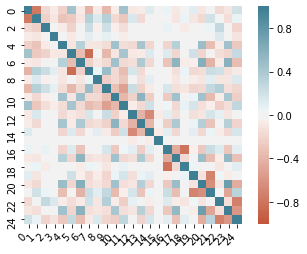

In [23]:
ax = sns.heatmap(
    attr_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [49]:
X_concat_train = hstack([lat_long_rc_train, cat_train, days_open_train, city_pc_st_train, attributes_train], format='csr')
X_concat_test = hstack([lat_long_rc_test, cat_test, days_open_test, city_pc_st_test, attributes_test], format='csr')

In [ ]:
X_concat_train
pd.DataFrame(X_concat_train.toarray()).corr()


In [44]:
corr = np.corrcoef(X_concat_train.toarray())

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
linreg = LinearRegression().fit(X_concat_train, y_train)

In [21]:
def estimate_value(a):
    if a < round(a) + 0.25:
        return round(a)
    elif a > round(a) + 0.75:
        return round(a) + 1
    else:
        return round(a) + 0.5

In [22]:
y_pred = linreg.predict(X_concat_test)
print(y_pred)
new_y_pred = []
for y_i in y_pred:
    new_y_pred.append(estimate_value(y_i))
print(new_y_pred)

[3.32591688 2.87090108 3.14740129 ... 2.46009015 3.0226333  2.80220894]
[3.5, 3.0, 3.0, 3.0, 3.5, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.5, 3.0, 2.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.0, 2.0, 3.5, 3.0, 3.5, 2.5, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.5, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.5, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 3.5, 3.0, 3.0, 2.5, 3.5, 3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.

In [23]:
print (linreg.score(X_concat_train, y_train))
print (linreg.score(X_concat_test, y_test))
print(r2_score(y_test, new_y_pred))

0.4873241594781244
-0.716164809811467
-0.5390599946477383


In [79]:
y_train.shape

(25065,)

In [87]:
linridge = Ridge()
parameters = {'alpha': [1e-8, 1, 5, 50, 100, 500, 1000]}
ridge_regressor = GridSearchCV(linridge, parameters, cv=5)
ridge_regressor.fit(X_concat_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-08, 1, 5, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
0.2862659062131025


In [ ]:
linridge()

In [73]:
# RIDGE

for this_alpha in [1e-8, 1, 5, 50, 100, 500, 1000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_concat_train, y_train)
    print('Alpha = ', this_alpha)
    print (linridge.score(X_concat_train, y_train))
    print(linridge.score(X_concat_test, y_test))
    print('----------------------------')


Alpha =  1e-08
0.4786805079708637
-0.7408922422371202
----------------------------
Alpha =  1
0.4486362790431643
-0.4742506023256495
----------------------------
Alpha =  5
0.391415384443599
-0.16693675833109944
----------------------------
Alpha =  50
0.32038500273273146
0.05203653263496045
----------------------------
Alpha =  100
0.30672518826543016
0.07417441087636978
----------------------------
Alpha =  500
0.2756502448549224
0.09185093682507794
----------------------------
Alpha =  1000
0.25716089409221954
0.09110151704510416
----------------------------


In [80]:
# TODO: Try using just the normalize numerical data -> lat_long_rc_train

for this_alpha in [1e-8, 1, 5, 50, 100, 500, 1000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(lat_long_rc_train, y_train)
    print('Alpha = ', this_alpha)
    print (linridge.score(lat_long_rc_train, y_train))
    print(linridge.score(lat_long_rc_test, y_test))
    print('----------------------------')


Alpha =  1e-08
0.02326074922839061
0.02672368778101264
----------------------------
Alpha =  1
0.023260749176344797
0.026723233608495378
----------------------------
Alpha =  5
0.023260747927743686
0.026721416566607422
----------------------------
Alpha =  50
0.023260619721925835
0.026700936360792737
----------------------------
Alpha =  100
0.023260233666607122
0.026678098948693548
----------------------------
Alpha =  500
0.023248337512965733
0.026492538516247773
----------------------------
Alpha =  1000
0.023213343066553538
0.026254463581946493
----------------------------


In [88]:
linlasso = Lasso()
parameters = {'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50]}
lasso_regressor = GridSearchCV(linlasso, parameters, cv=5)
lasso_regressor.fit(X_concat_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.5}
-2.5652050806046488e-05


In [83]:
# LASSO

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha=alpha, normalize=True)
    linlasso.fit(X_concat_train, y_train)
    #r2_train = linlasso.score(X_concat_train, y_train)
    #r2_test = linlasso.score(X_concat_test, y_test)
    
    print('Alpha = ', alpha)
    print(linlasso.score(X_concat_train, y_train))
    print(linlasso.score(X_concat_test, y_test))
    print('----------------------------')


Alpha =  0.5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  1
0.0
-6.622746795414969e-10
----------------------------
Alpha =  2
0.0
-6.622746795414969e-10
----------------------------
Alpha =  3
0.0
-6.622746795414969e-10
----------------------------
Alpha =  5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  10
0.0
-6.622746795414969e-10
----------------------------
Alpha =  20
0.0
-6.622746795414969e-10
----------------------------
Alpha =  50
0.0
-6.622746795414969e-10
----------------------------


In [81]:
# TODO: Try using just the normalize numerical data -> lat_long_rc_train

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha)
    linlasso.fit(lat_long_rc_train, y_train)
    #r2_train = linlasso.score(X_concat_train, y_train)
    #r2_test = linlasso.score(X_concat_test, y_test)
    
    print('Alpha = ', alpha)
    print(linlasso.score(lat_long_rc_train, y_train))
    print(linlasso.score(lat_long_rc_test, y_test))
    print('----------------------------')

Alpha =  0.5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  1
0.0
-6.622746795414969e-10
----------------------------
Alpha =  2
0.0
-6.622746795414969e-10
----------------------------
Alpha =  3
0.0
-6.622746795414969e-10
----------------------------
Alpha =  5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  10
0.0
-6.622746795414969e-10
----------------------------
Alpha =  20
0.0
-6.622746795414969e-10
----------------------------
Alpha =  50
0.0
-6.622746795414969e-10
----------------------------


In [44]:
sum(y_train)/len(y_train)
len(y_train[y_train==3.5])/len(y_train)
len(y_train[y_train==4])/len(y_train)
len(y_test[y_test==4])/len(y_test)
import statistics
statistics.median(y_train)

3.5

In [0]:
#basic tree-low accuracy

from sklearn.tree import DecisionTreeClassifier
#from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_cat_train = lab_enc.fit_transform(y_train)
y_cat_test = lab_enc.transform(y_test)

clf = DecisionTreeClassifier().fit(X_concat_train, y_cat_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_concat_train, y_cat_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_concat_test, y_cat_test)))

clf.feature_importances_

In [0]:
#tree with limited depth-slightly better training accuracy

clf2 = DecisionTreeClassifier(max_depth = 4).fit(X_concat_train, y_cat_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_concat_train, y_cat_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_concat_test, y_cat_test)))

#increasing the max_depth increases training accuracy, but test accuracy is maxed at about 0.29 with max_depth = 4

In [0]:
#random forest-need to tune parameters more but also low accuracy (~0.27)

from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators = 20, max_features=5,
                            random_state=0).fit(X_concat_train, y_cat_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf3.score(X_concat_train, y_cat_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf3.score(X_concat_test, y_cat_test)))

In [0]:
#gradient boosting-best accuracy (~0.31)

from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier().fit(X_concat_train, y_cat_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf4.score(X_concat_train, y_cat_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf4.score(X_concat_test, y_cat_test)))

In [0]:
gb_predicted_mc = clf4.predict(X_concat_test)
confusion_mc = confusion_matrix(y_cat_test, gb_predicted_mc)
target_names = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
df_cm = pd.DataFrame(confusion_mc, 
                     index = target_names, columns = target_names)

plt.figure(figsize=(5.5, 4))
sn.heatmap(df_cm, annot=True)
plt.title('GBDT \nAccuracy:{0:.3f}'.format(accuracy_score(y_cat_test, 
                                                                       gb_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_cat_test, gb_predicted_mc))

In [0]:
#slow, would need to tune parameters

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_concat_train, y_cat_train)
print(svm.score(X_concat_test, y_cat_test))

In [0]:
#LR- worst accuracy (~0.24)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(C=20).fit(X_concat_train, y_cat_train)
lr_predicted_mc = lr.predict(X_concat_test)
confusion_mc = confusion_matrix(y_cat_test, lr_predicted_mc)
target_names = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
df_cm = pd.DataFrame(confusion_mc, 
                     index = target_names, columns = target_names)

plt.figure(figsize=(5.5, 4))
sn.heatmap(df_cm, annot=True)
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_cat_test, 
                                                                       lr_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_cat_test, lr_predicted_mc))